In [45]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pwd
#%ls


'/Users/rikesan/Documents/GitHub/IronHenrike/Labs/06_Customer_Analysis_Case_Study'

load the csv-File:

In [46]:
df=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")

inspect the data types

In [47]:
print(df.dtypes)

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

## Standardizing header names

In [48]:

def standardize_headers(file):
    file = file.rename(columns={'ST':'state'}) # replace 'st' with 'state'
    headers = [] # make list of all headers
    for col in file.columns:
        headers.append(col.lower().replace(" ", "_")) #change headers into lower case & replace
    #print(headers)
    file.columns = headers # replace data frame headers with lower-case list 
    return file

df = standardize_headers(df)

## Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

In [49]:
df = df.drop(['customer'], axis=1) 
#deletes the column 'customer'. axis=1 means axis=columns

## Activity 4
Show a plot of the total number of responses.


In [50]:
# df_test = pd.DataFrame({'response':['yes', 'no'], 'number':[8000, 3000]})
# ax = df_test.plot.bar(x='response', y='number')
# ax

In [51]:

# print(df.loc[df['response'] == 'No'])


In [52]:
(df['response'].value_counts())
# a list of the categories in the column

number_of_responses = (df['response'].value_counts())
# variable that contains the categories and the counts of values of the column

In [53]:

# print(number_of_responses)
# print(number_of_responses.index)
# print((df['response'].value_counts()).index) 



<AxesSubplot:title={'center':'Seaborn total responses'}, ylabel='response'>

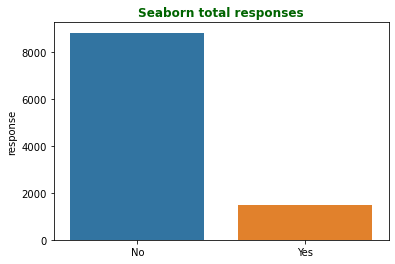

In [54]:
ax1 = sns.barplot(x=number_of_responses.index, y=number_of_responses, data=df) 
#creates a barplot, with the categories of a column on x-axis and their numbers on y-axis

ax1.set_title('Seaborn total responses', fontweight='bold', color='darkgreen')
# sets the title of the barplot, the fontweight and color
ax1



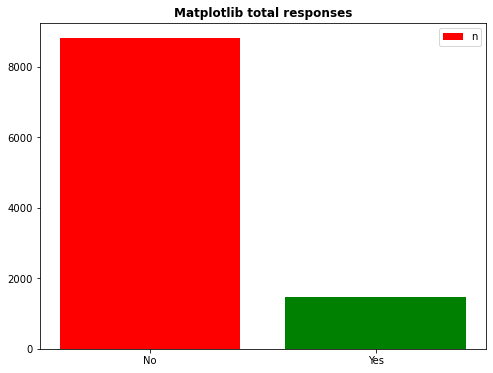

In [55]:

#ax3.bar(x=number_of_responses.index, y=number_of_responses)

# create figure and axes
fig3, ax2 = plt.subplots(figsize = (8,6))

# set title
ax2.set_title('Matplotlib total responses', fontweight='bold')

# plot the bar chart
ax2.bar(number_of_responses.index, number_of_responses, color=('red','green'))

ax2.legend('no')


In [56]:
#dataFrame.plot.bar(x="City", y="Visits", rot=70, title="Number of tourist visits - Year 2018");


#df.plot.bar()

#plot.show(block=True);


#df.response.plot.hist()

#df.response.value_counts(['yes'])

#df_grouped=df.groupby(['total_claim_amount','response']).size()
#df_grouped


In [57]:
# df_unstacked=df_grouped.unstack()
# df_unstacked


In [58]:
#df_grouped.plot(kind='bar')

In [59]:


# sns.set_palette('RdYlGn')
# palette_alive = {"yes": "C5", "no": "C0"}

df
df.groupby('gender').describe()

unnamed:_0                                                         \
            count         mean          std  min     25%     50%     75%   
gender                                                                     
F          5573.0  5403.213530  3151.431825  1.0  2702.0  5430.0  8125.0   
M          5337.0  5508.054338  3147.068876  0.0  2746.0  5479.0  8228.0   

                customer_lifetime_value               ... number_of_policies  \
            max                   count         mean  ...                75%   
gender                                                ...                      
F       10908.0                  5573.0  8071.105001  ...                4.0   
M       10909.0                  5337.0  7963.039566  ...                4.0   

            total_claim_amount                                                \
        max              count        mean         std       min         25%   
gender                                                                         
F       9.0             5573.0  411.879570  273.033569  0.423310  250.058657   
M       9.0             5337.0  458.914527  309.121305  0.099007  292.800000   

                                             
               50%         75%          max  
gender                                       
F       362.517940  534.501024  2452.894264  
M       402.778867  566.400000  2893.239678  

[2 rows x 72 columns]

Show a plot of the response rate by the sales channel.


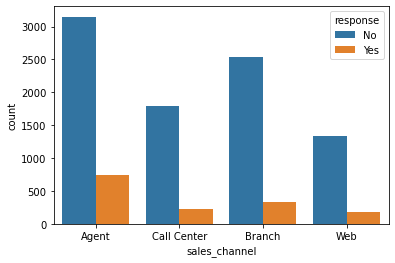

In [60]:
#sales_response = df.groupby(['sales_channel','number_of_responses'])['survived'].count().reset_index()
#class_survival = titanic.groupby(['class','alive'])['survived'].count().reset_index()
#df.groupby(['sales_channel','response']).count()
#number_of_responses.count()#.reset_index()
#test = titanic.groupby(['class','alive']).count()
#test=titanic.survived.count()#.reset_index()
#class_survival
#test
sns.countplot(x='sales_channel', hue='response', data=df);
#sns.countplot(x='response', hue='sales_channel', data=df)


In [61]:
#ax3 = sns.barplot(x=number_of_responses.index, y="sales_channel", hue=number_of_responses, data=df)
#ax3 = sns.barplot(x=number_of_responses.index, y=number_of_responses, data=df)

#ax1 = sns.barplot(x=number_of_responses.index, y=number_of_responses, data=df) 
#creates a barplot, with the categories of a column on x-axis and their numbers on y-axis
#ax3.set_title('Seaborn total responses', fontweight='bold', color='darkgreen')
# sets the title of the barplot, the fontweight and color
#ax3

Show a plot of the response rate by the total claim amount.


In [69]:
#fig2,axes2 = plt.subplots(1,3,figsize = (30,10))
##df=df.groupby(['total_claim_amount','response']).size()
#df=df.unstack()
#df.plot(kind='bar')

#sns.lineplot(x='total_claim_amount', y='response', data=df)
#df['total_claim_amount']

#sns.lineplot(data=df, x="total_claim_amount", y="response", #hue="response",
            #   split=True, inner="quart", linewidth=1,
            #   palette={"Yes": "b", "No": ".85"})
#sns.despine(left=True)

# sns.lineplot(x="total_claim_amount",
#             #y="response",
#             hue="response", 
#              #style="gender",
#             data=df)

In [63]:

import seaborn as sns
#sns.countplot(y='response', hue='total_claim_amount', data=df, palette="Greens_d")

In [64]:
#plt.scatter(x=)

Show a plot of the response rate by income.



In [65]:
#df
# sns.lmplot('income', 'total_claim_amount', hue='response', data=df, fit_reg=False)
#sns.barplot('income', 'total_claim_amount', hue='response', data=df, fit_reg=False)

Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.


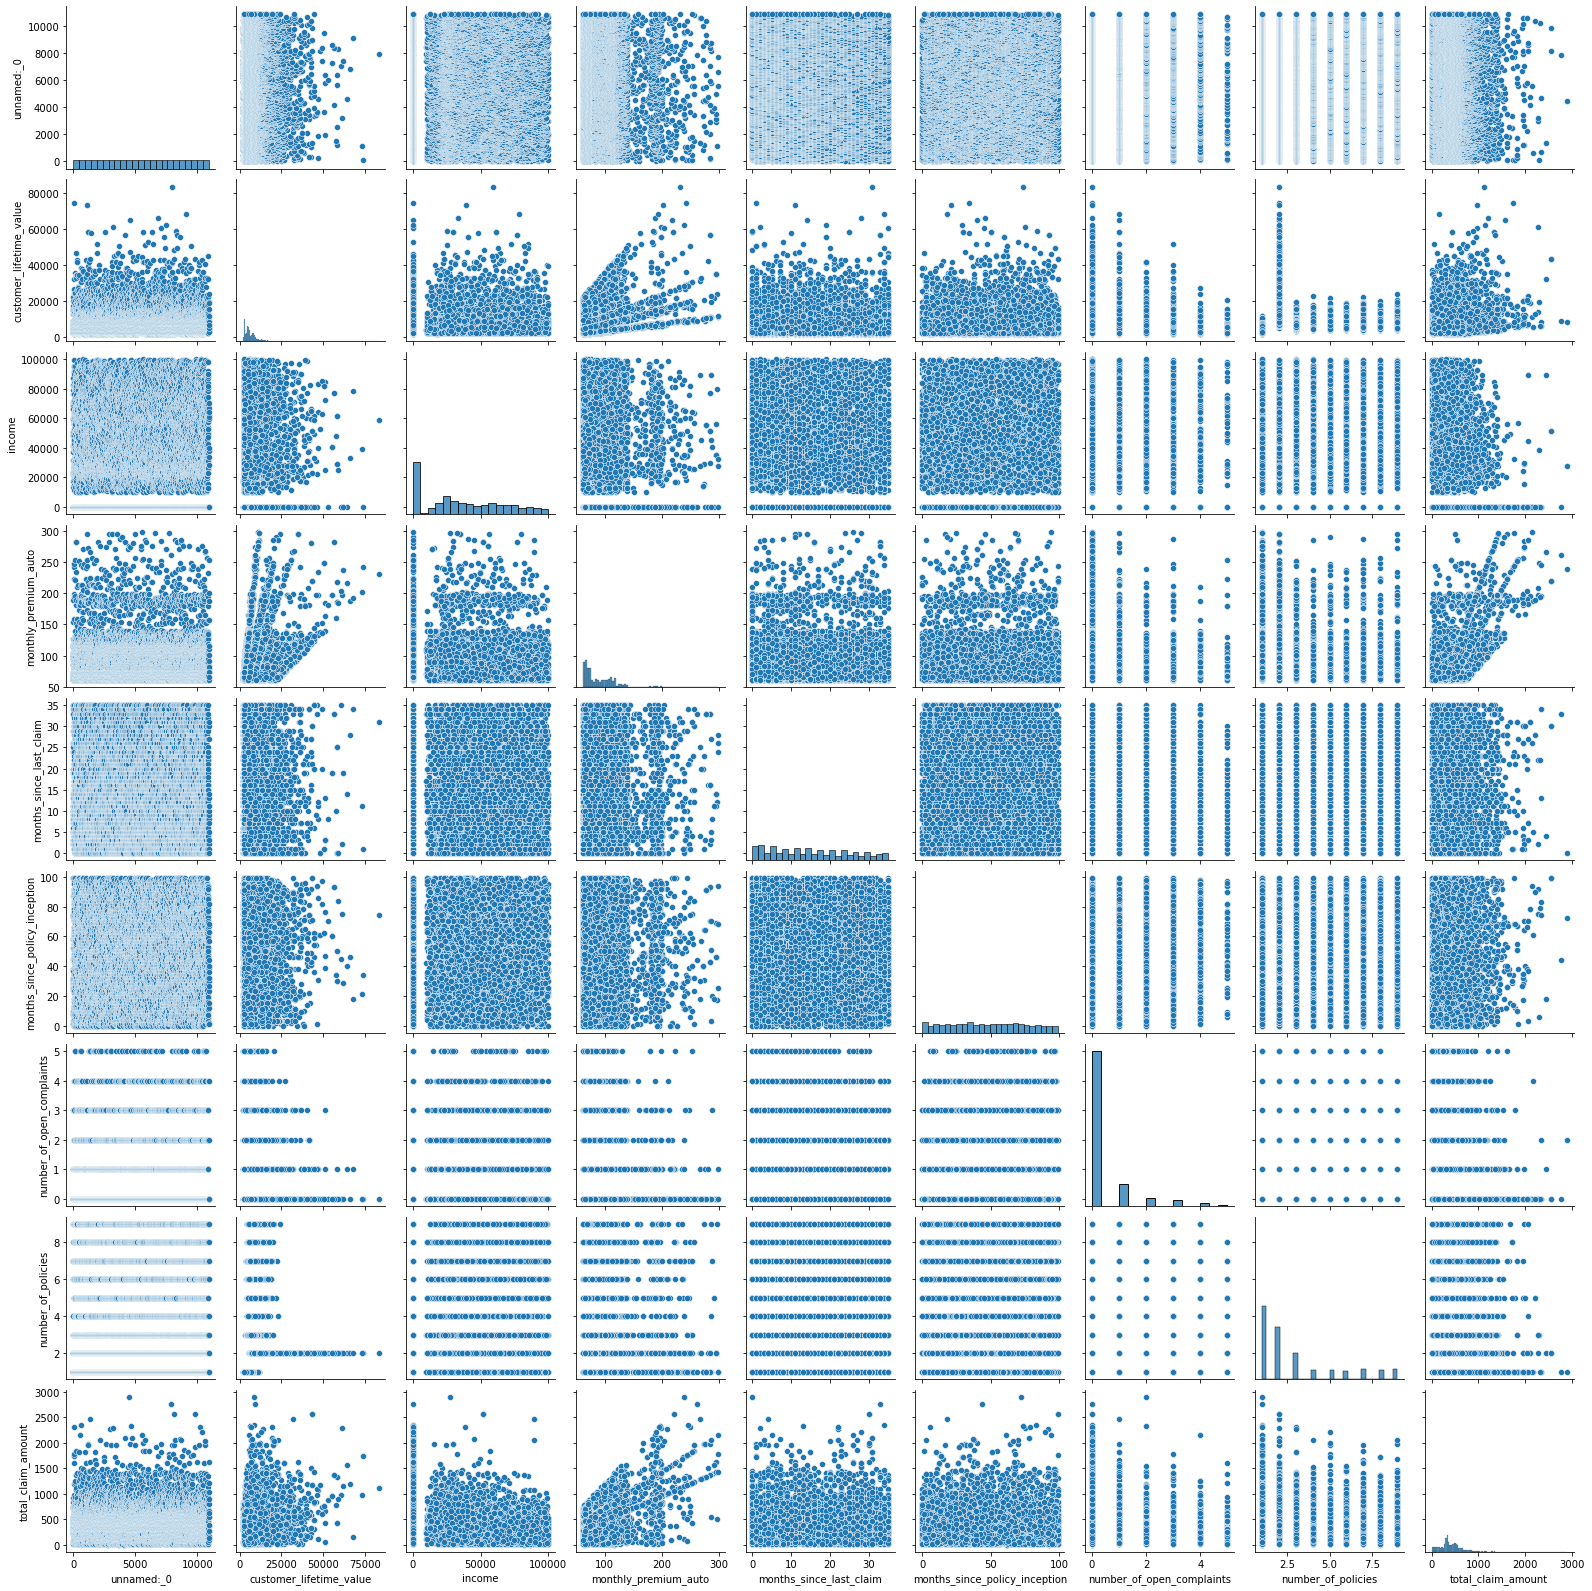

In [66]:
sns.pairplot(df)

In [67]:
#df_new = df.drop([500:-1])
#df.iloc[row_start:row_end , col_start, col_end]
df_new = df.iloc[0:500 , : ]
df_new


,unnamed:_0,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Washington,8861.900439,No,Premium,Doctor,1/16/11,Employed,F,41854,...,0.0,8,Personal Auto,Personal L3,Offer1,Agent,481.269644,Four-Door Car,Medsize,NaN
496,496,Oregon,9035.671134,Yes,Premium,High School or Below,1/21/11,Employed,F,34337,...,NaN,9,Corporate Auto,Corporate L1,Offer2,Web,542.400000,Four-Door Car,Large,A
497,497,Washington,7503.367741,No,Extended,College,2/6/11,Employed,M,52464,...,0.0,3,Personal Auto,Personal L2,Offer4,Agent,515.930856,Four-Door Car,Medsize,A
498,498,Washington,4462.445111,No,Basic,College,2/8/11,Employed,M,70088,...,0.0,1,Personal Auto,Personal L3,Offer2,Call Center,536.481665,SUV,Large,NaN


In [68]:
sns.heatmap(df_new)


ValueError: could not convert string to float: 'Arizona'

Plot the Correlation Heatmap.


Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.


Activity 5


Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
Now we will try to check the normality of the numerical variables visually


Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features